# Imports

In [35]:
from regression_model_comparison import RegressionModelComparison

import numpy as np
import pandas as pd
import time

import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning

# Data

## Chargement

In [2]:
data_train = pd.read_csv('data/donapp.csv', header=0, sep=',', decimal='.')
display(data_train.head(3))
data_train.info()

,Pitch_angle,Pitch_angle_std,Hub_temperature,Hub_temperature_std,Generator_converter_speed,Generator_converter_speed_std,Generator_speed,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_std,...,Grid_frequency,Grid_frequency_std,Rotor_speed,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_std,Nacelle_angle_c,AbsWindSin,AbsWindCos,Y
0,92.410004,0.0,8.24,0.28,3.92,0.01,0.17,0.80,7.70,0.01,...,49.98,0.01,0.0,0.0,2.38,0.06,302.89999,-0.853187,0.521605,-2.727
1,92.410004,0.0,6.83,0.49,3.93,0.38,0.17,1.89,7.70,0.00,...,0.00,22.26,0.0,0.0,2.32,0.03,302.89999,-0.836286,0.548293,0.100
2,92.410004,0.0,2.00,0.00,4.26,0.02,0.00,0.05,-1.69,0.10,...,50.00,0.01,0.0,0.0,-2.10,0.07,301.81000,0.995193,0.097930,-4.993


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20423 entries, 0 to 20422
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Pitch_angle                          20423 non-null  float64
 1   Pitch_angle_std                      20423 non-null  float64
 2   Hub_temperature                      20423 non-null  float64
 3   Hub_temperature_std                  20423 non-null  float64
 4   Generator_converter_speed            20423 non-null  float64
 5   Generator_converter_speed_std        20423 non-null  float64
 6   Generator_speed                      20423 non-null  float64
 7   Generator_speed_std                  20423 non-null  float64
 8   Generator_bearing_1_temperature      20423 non-null  float64
 9   Generator_bearing_1_temperature_std  20423 non-null  float64
 10  Generator_bearing_2_temperature      20423 non-null  float64
 11  Generator_bearing_2_temperat

In [3]:
data_test = pd.read_csv('data/dontest.csv', header=0,  sep=',', decimal='.')
display(data_test.head(3))
data_test.info()

,Pitch_angle,Pitch_angle_std,Hub_temperature,Hub_temperature_std,Generator_converter_speed,Generator_converter_speed_std,Generator_speed,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_std,...,Grid_frequency,Grid_frequency_std,Rotor_speed,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_std,Nacelle_angle_c,AbsWindSin,AbsWindCos,Y
0,-1.010000,0.0,20.969999,0.23,1423.75,63.220001,1424.6899,63.330002,40.160000,0.24,...,50.049999,0.01,13.55,0.6,35.619999,0.02,241.44,-0.799789,-0.600281,385.199
1,89.980003,0.0,22.000000,0.00,2.98,0.010000,0.0000,0.000000,39.860001,0.09,...,50.000000,0.01,0.00,0.0,30.590000,0.10,79.00,0.570714,0.821149,-4.454
2,91.949997,0.0,26.000000,0.00,2.85,0.010000,0.0000,0.000000,37.970001,0.11,...,50.020000,0.01,0.00,0.0,27.959999,0.04,52.66,-0.814217,-0.580561,-2.001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Pitch_angle                          5000 non-null   float64
 1   Pitch_angle_std                      5000 non-null   float64
 2   Hub_temperature                      5000 non-null   float64
 3   Hub_temperature_std                  5000 non-null   float64
 4   Generator_converter_speed            5000 non-null   float64
 5   Generator_converter_speed_std        5000 non-null   float64
 6   Generator_speed                      5000 non-null   float64
 7   Generator_speed_std                  5000 non-null   float64
 8   Generator_bearing_1_temperature      5000 non-null   float64
 9   Generator_bearing_1_temperature_std  5000 non-null   float64
 10  Generator_bearing_2_temperature      5000 non-null   float64
 11  Generator_bearing_2_temperatur

## Observation des données

Y a-t-il des valeurs manquantes ?

In [4]:
data_train.isna().sum()

Pitch_angle                            0
Pitch_angle_std                        0
Hub_temperature                        0
Hub_temperature_std                    0
Generator_converter_speed              0
Generator_converter_speed_std          0
Generator_speed                        0
Generator_speed_std                    0
Generator_bearing_1_temperature        0
Generator_bearing_1_temperature_std    0
Generator_bearing_2_temperature        0
Generator_bearing_2_temperature_std    0
Generator_stator_temperature           0
Generator_stator_temperature_std       0
Gearbox_bearing_1_temperature          0
Gearbox_bearing_1_temperature_std      0
Gearbox_bearing_2_temperature          0
Gearbox_bearing_2_temperature_std      0
Gearbox_inlet_temperature              0
Gearbox_inlet_temperature_std          0
Gearbox_oil_sump_temperature           0
Gearbox_oil_sump_temperature_std       0
Nacelle_angle                          0
Nacelle_temperature_std                0
Absolute_wind_di

In [5]:
data_test.isna().sum()

Pitch_angle                            0
Pitch_angle_std                        0
Hub_temperature                        0
Hub_temperature_std                    0
Generator_converter_speed              0
Generator_converter_speed_std          0
Generator_speed                        0
Generator_speed_std                    0
Generator_bearing_1_temperature        0
Generator_bearing_1_temperature_std    0
Generator_bearing_2_temperature        0
Generator_bearing_2_temperature_std    0
Generator_stator_temperature           0
Generator_stator_temperature_std       0
Gearbox_bearing_1_temperature          0
Gearbox_bearing_1_temperature_std      0
Gearbox_bearing_2_temperature          0
Gearbox_bearing_2_temperature_std      0
Gearbox_inlet_temperature              0
Gearbox_inlet_temperature_std          0
Gearbox_oil_sump_temperature           0
Gearbox_oil_sump_temperature_std       0
Nacelle_angle                          0
Nacelle_temperature_std                0
Absolute_wind_di

Pas de valeurs manquantes, merci Eric

Observation de quelques variables via Describe

In [6]:
data_train.describe()

,Pitch_angle,Pitch_angle_std,Hub_temperature,Hub_temperature_std,Generator_converter_speed,Generator_converter_speed_std,Generator_speed,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_std,...,Grid_frequency,Grid_frequency_std,Rotor_speed,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_std,Nacelle_angle_c,AbsWindSin,AbsWindCos,Y
count,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,...,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000
mean,11.827245,0.966495,19.963960,0.088400,1092.020753,62.578941,1092.631547,62.788820,39.810544,0.401748,...,49.974002,0.018661,10.387831,0.599220,31.244530,0.055423,178.807564,-0.100404,-0.104536,385.929542
std,26.054090,4.313085,6.827110,0.145344,590.726621,78.597941,591.885414,78.623959,7.848546,0.305192,...,1.067798,0.418653,5.638842,0.748875,7.181041,0.041361,96.302313,0.711867,0.687229,469.385523
min,-30.410000,0.000000,0.320000,0.000000,0.000000,0.000000,-0.040000,0.000000,-2.490000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-5.200000,0.000000,0.240000,-1.000000,-1.000000,-17.357000
25%,-1.010000,0.000000,15.000000,0.000000,926.760010,12.585000,927.039980,12.770000,38.070000,0.180000,...,49.990002,0.010000,8.800000,0.120000,28.820000,0.020000,81.199997,-0.796319,-0.783042,31.444500
50%,-1.000000,0.000000,20.000000,0.000000,1197.939900,37.830002,1198.760000,37.900002,41.680000,0.340000,...,50.000000,0.010000,11.390000,0.360000,32.770000,0.050000,199.730000,-0.236499,-0.178287,210.651000
75%,2.190000,0.000000,25.000000,0.130000,1583.455000,85.704998,1585.015000,85.820000,44.439999,0.530000,...,50.009998,0.010000,15.080000,0.820000,35.799999,0.090000,252.420000,0.636819,0.556731,568.481022
max,156.820010,72.589996,37.040001,0.750000,1802.340000,869.690000,1803.740000,872.190000,62.740002,2.290000,...,50.110001,24.840000,17.180000,8.300000,43.880001,0.420000,359.980010,1.000000,0.999999,2248.137000


In [7]:
data_train[data_train.Y <0].shape

(4226, 36)

La cible peut prendre des valeurs négatives

## Points leviers

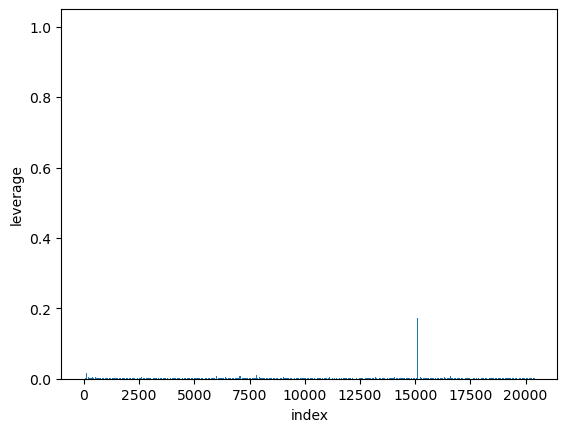

In [8]:
#Fit linear model
X = data_train.drop(columns=['Y'])
Y = data_train.Y

model = sm.OLS(Y, X)
results = model.fit()

#create instance of influence
influence = results.get_influence()
#leverage (hat values)
leverage = influence.hat_matrix_diag

fig = plt.bar(height=leverage, x=range(leverage.shape[0]))
plt.xlabel('index')
plt.ylabel('leverage')

plt.show();

On peut observer un point levier dont il pourrait être bon d'étudier l'éventuelle influence mais que nous laisserons pour aujourd'hui par manque de temps

## Plot 2D

Observation de la relation entre la cible Y et la vitesse de rotor

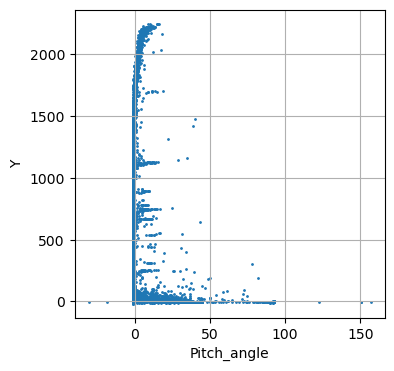

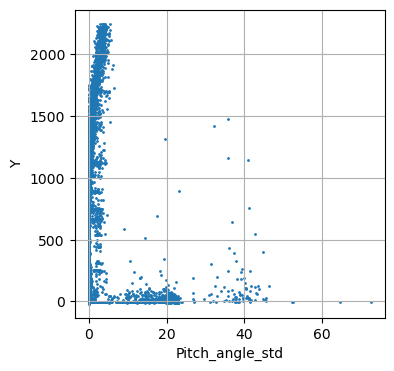

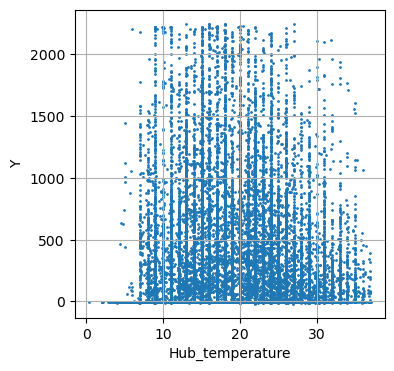

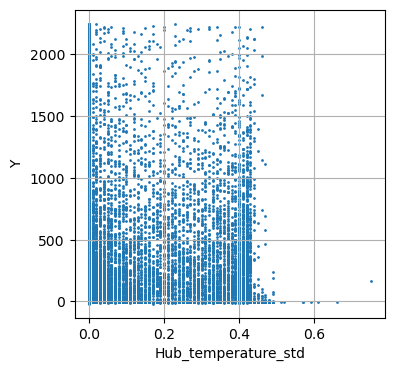

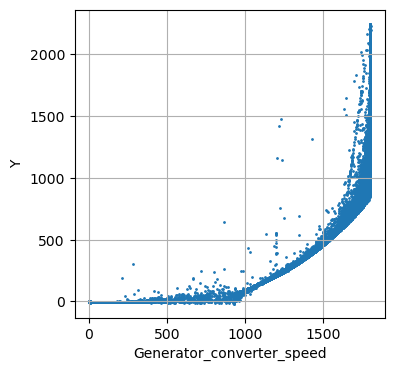

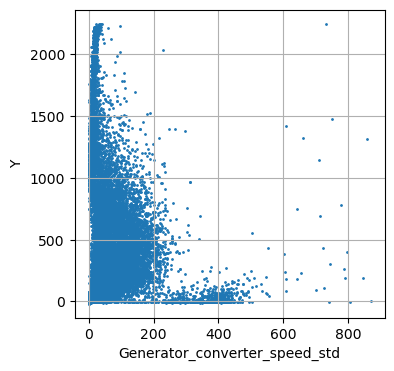

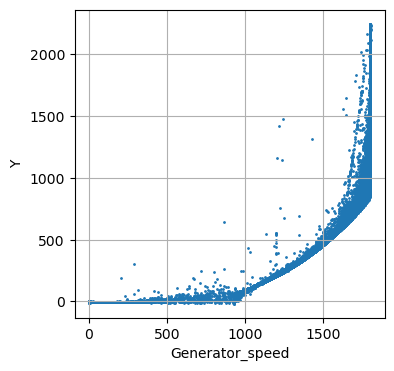

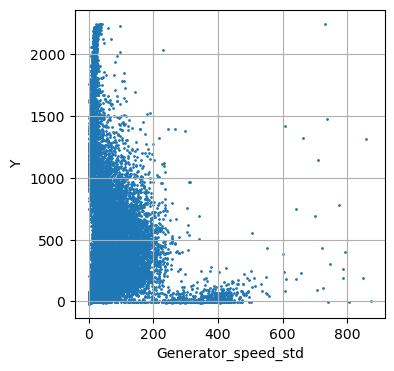

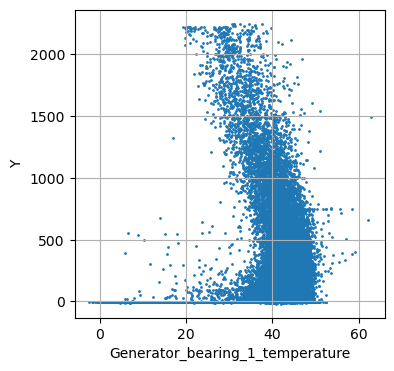

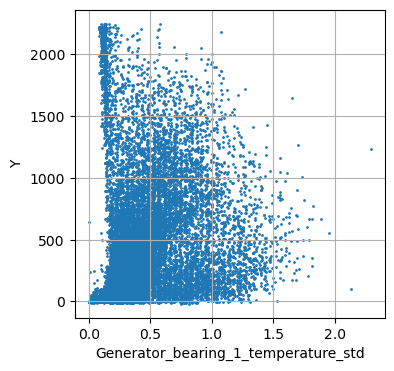

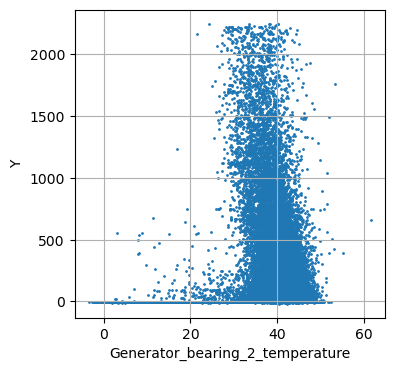

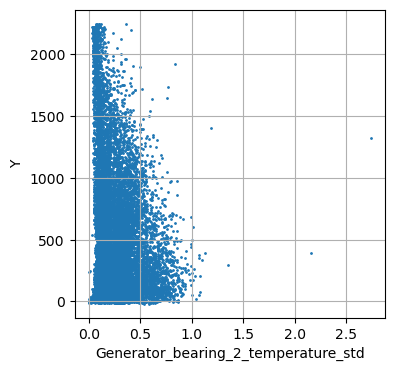

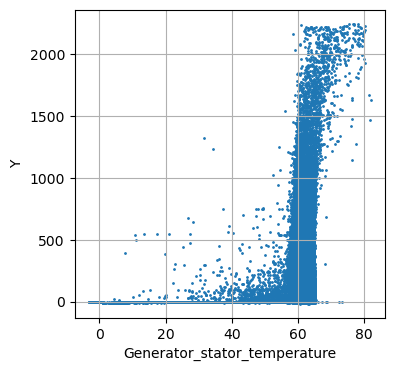

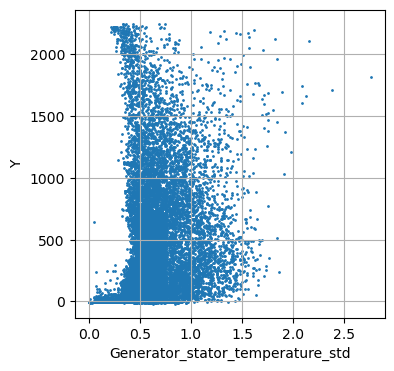

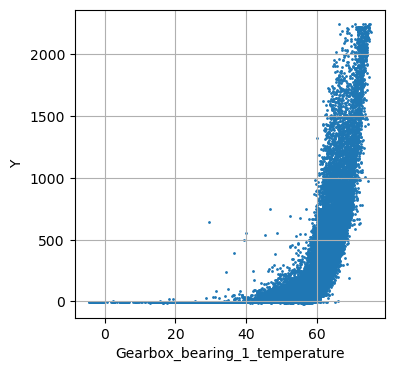

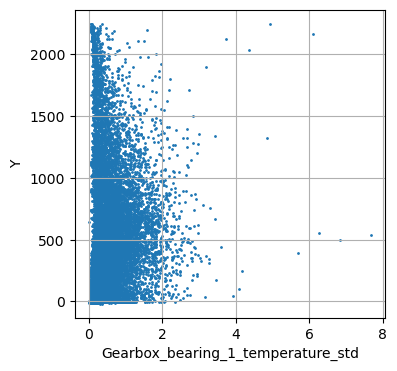

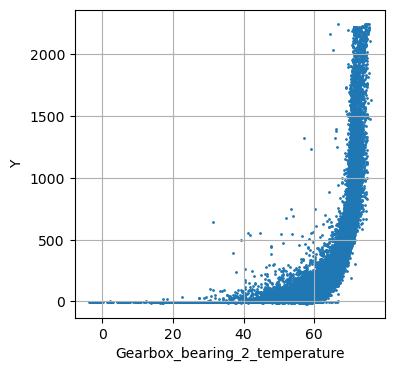

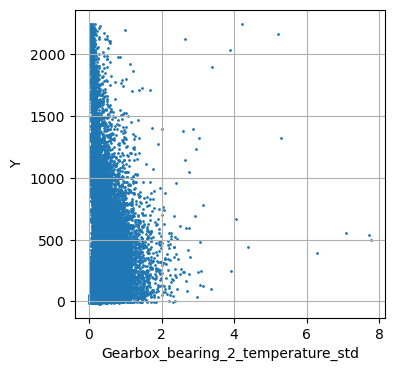

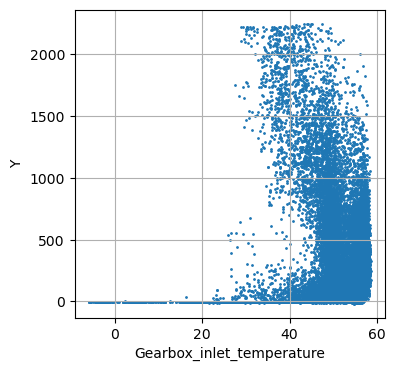

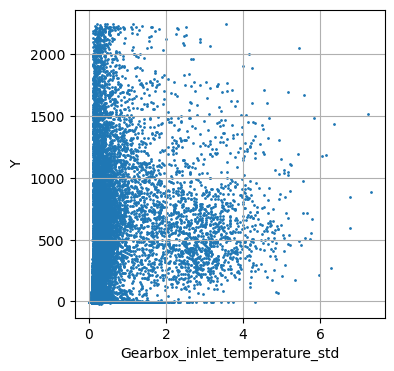

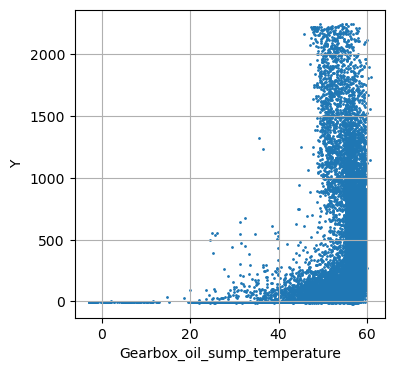

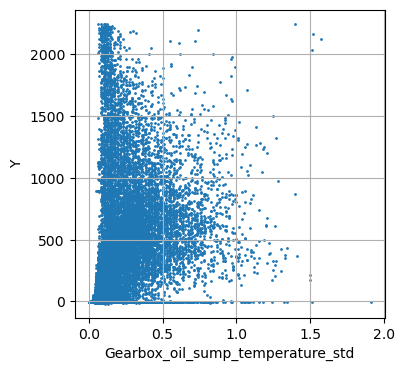

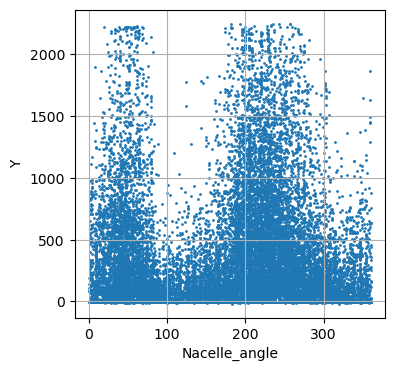

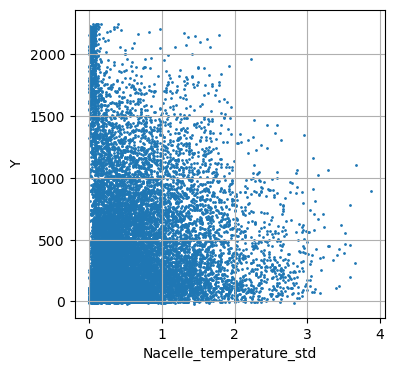

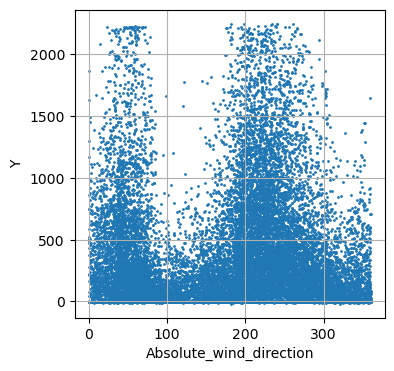

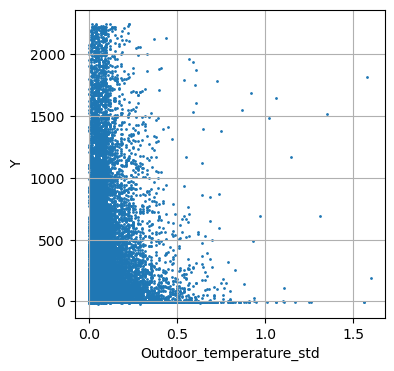

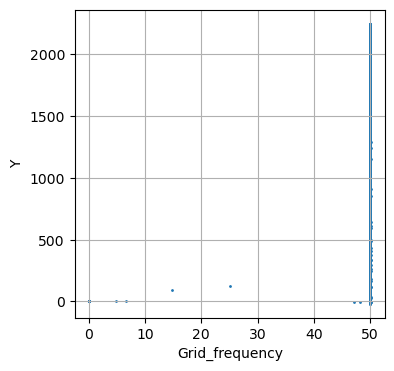

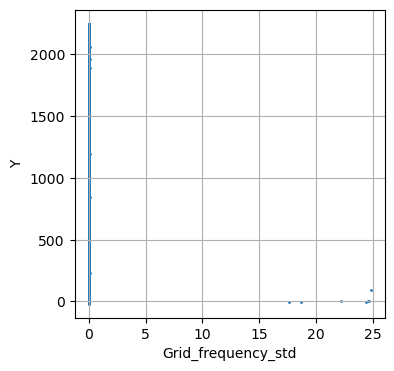

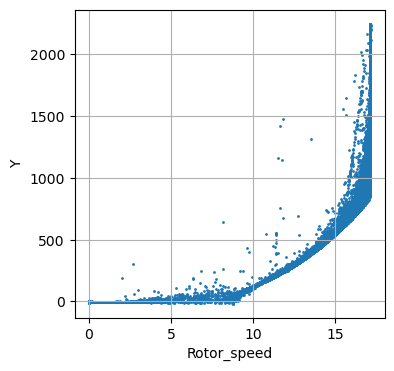

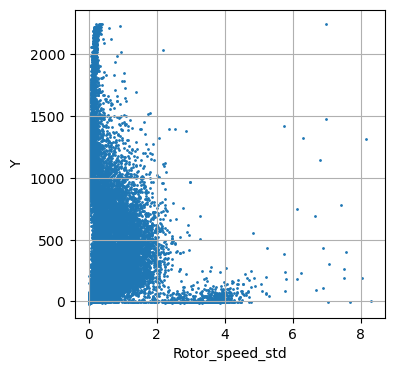

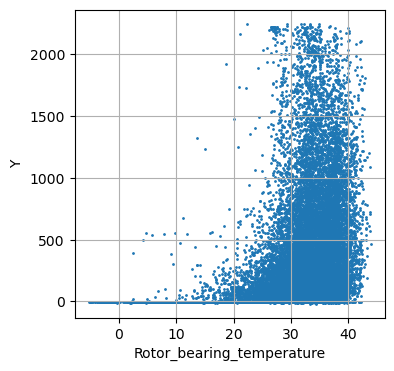

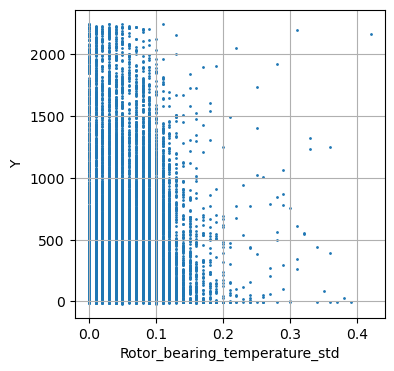

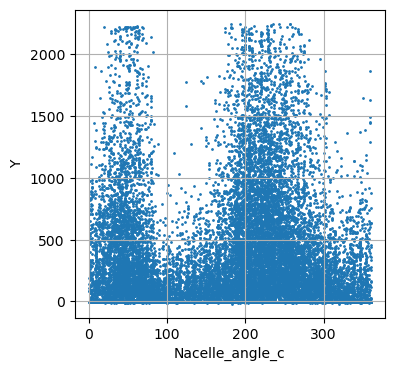

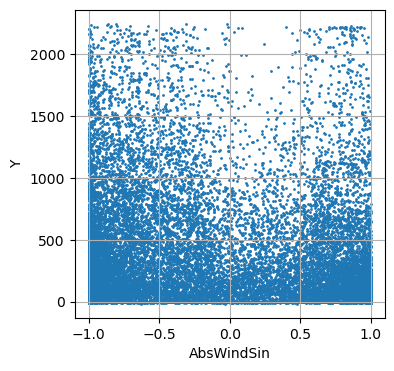

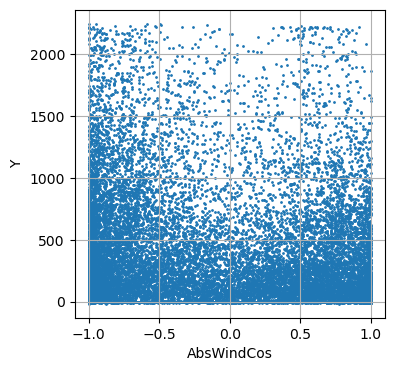

In [9]:
for col in data_train.drop(columns=['Y']).columns:
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(data_train[col], data_train['Y'], s=1)
    ax.grid()
    ax.set_xlabel(col)
    ax.set_ylabel('Y')
    plt.show()

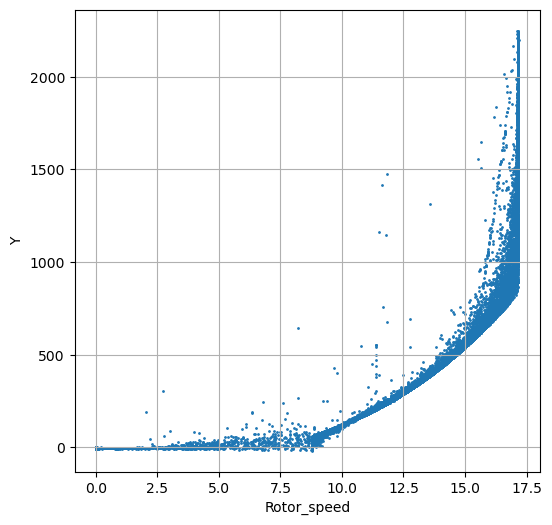

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(data_train['Rotor_speed'], data_train['Y'], s=1)
ax.grid()
ax.set_xlabel('Rotor_speed')
ax.set_ylabel('Y')
plt.show()

Relation non linéaire ou linéaire par seuils, splines ?

## Définition des features numériques et des features tansformables

A priori pas de variable catégorielle à considérer, uniquement des variables continues  

On choisi plusieurs variables sur lesquelles nous appliqueront du feature engineering (création de combinaisons polynomiales ou splines)

In [11]:
numerical_features = ['Pitch_angle', 'Pitch_angle_std', 'Hub_temperature',
       'Hub_temperature_std',
       'Generator_converter_speed_std',
       'Generator_speed_std', 'Generator_bearing_1_temperature',
       'Generator_bearing_1_temperature_std',
       'Generator_bearing_2_temperature',
       'Generator_bearing_2_temperature_std', 'Generator_stator_temperature',
       'Generator_stator_temperature_std',
       'Gearbox_bearing_1_temperature_std',
       'Gearbox_bearing_2_temperature_std', 'Gearbox_inlet_temperature',
       'Gearbox_inlet_temperature_std', 'Gearbox_oil_sump_temperature',
       'Gearbox_oil_sump_temperature_std', 'Nacelle_angle',
       'Nacelle_temperature_std', 'Absolute_wind_direction',
       'Outdoor_temperature_std', 'Grid_frequency', 'Grid_frequency_std',
       'Rotor_speed', 'Rotor_speed_std', 'Rotor_bearing_temperature',
       'Rotor_bearing_temperature_std', 'Nacelle_angle_c', 'AbsWindSin',
       'AbsWindCos']

other_features = ['Rotor_speed', 'Generator_speed', 'Generator_converter_speed', 'Gearbox_bearing_1_temperature', 'Gearbox_bearing_2_temperature']

# Modelisation

Le dataset fait environ 20000 lignes. On se contente d'en choisir 5000 au hasard pour se procurer un premier échantillon pour la comparaison de modèles avant de réentrainer le modèle optimisé vainqueur sur l'ensemble du jeu d'entraînement

## Comparaison de modèles sur échantillon

On retire les warning de convergence pour la lisibilité du rendu

In [12]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [29]:
start_time = time.time()

sample_size = 5000 # Taille du sample de dataset qui permet le choix des hyperparamètres
seed = 3
test_size = 0.1 # Taille du jeu de validation pour la recherche sur grille des meilleurs modèles et hyperparamètres
metrics = ['mse', 'mae']

# Extrait d'un échantillon de taille sample_size pour la comparaison de modèles et recherche sur grille
df_sample = data_train.sample(sample_size, random_state=seed)
X = df_sample.drop(columns=['Y'])
Y = df_sample.Y

# 1ère comparaison de modèles sur le sample
comparison = RegressionModelComparison(
    X,
    Y,
    scorings=metrics,
    test_size=test_size,
    seed=seed,
    mlflow=False
    )

# Préparation des preprocesseurs
comparison.preprocessing(
    numerical_features,
    other_features,
    nknots=4, # Nombre de knot des features splines
    poly_order=2, # Degré des polynomes des features polynomiales
    scaler='standard', # Scaler des features numériques
    verbose=False
    )

df_results = comparison.run_comparison(
    preproc=['base', 'poly', 'splines'], # Préprocesseurs à tester (base, poly ou splines)
    model_param={
        'linear_regression': {},
        'ridge': {},
        'lasso': {},
        'elasticnet': {},
        'xgboost': {
            "regressor__n_estimators": [50, 100, 150, 200, 250],
            "regressor__learning_rate": [0.01, 0.05, 0.1]
            },
        'randomforest': {
            'regressor__n_estimators' : [100, 300], # Nombre d'arbres dans la forêt. defaut 100
            'regressor__max_depth' : [None, 20], # Profondeur maximale des arbres. Si None, les arbres sont développés jusqu'à ce que toutes les feuilles soient pures ou que chaque feuille contienne moins que min_samples_split échantillons
            'regressor__max_features': [3, X.shape[1] / 3] # Nombre maximum de caractéristiques considérées pour chaque split (division d'un nœud en deux sous-nœuds)
            },
        'grd_boosting': {
            'regressor__learning_rate' : [.01, 1],
            'regressor__max_depth' : [3, 7],
            'regressor__subsample' : [0.5, 1],
            'regressor__n_estimators' : [100, 300]
            }
        },
    nfolds=5,
    refit_metric='mse',
    verbose=False
    )

# Selection du meilleur modèle selon la MSE sur le jeu de test du dataset sample lors de la recherche sur grille
best = df_results[df_results.mse_test == df_results.mse_test.min()]
best_model = best.model.iloc[0]

# Préparation de l'ensemble du dataset
X_train = data_train.drop(columns=['Y'])
Y_train = data_train.loc[:, 'Y']
X_test = data_test.drop(columns=['Y'])
Y_test = data_test.loc[:, 'Y']

# Entraînement et test sur l'ensemble du dataset
best_model.fit(X_train, Y_train)
estimation = best_model.predict(X_train)
prevision = best_model.predict(X_test)

scores = {}
for metric in metrics: 
    scores[metric] = {}
    if metric == 'mae':
        scores[metric]['train'] = mean_absolute_error(y_true=Y_train, y_pred=estimation)
        scores[metric]['test'] = mean_absolute_error(y_true=Y_test, y_pred=prevision)            
    elif metric == 'mse':
        scores[metric]['train'] = mean_squared_error(y_true=Y_train, y_pred=estimation)
        scores[metric]['test'] = mean_squared_error(y_true=Y_test, y_pred=prevision)

duration = time.time() - start_time
print(f"Total duration of computation = {duration / 60} minutes")

##### Splitting Dataset with test_size = 0.1 and random_state = 3
###### Start comparison ######
Using preprocessor : base
Using regressor : linear_regression
Refit finalized using mse
Prevision score using ## mse ## on test set = 19170.858794884785
Prevision score using ## mae ## on test set = 95.89629328118954
Using regressor : ridge
Refit finalized using mse
Prevision score using ## mse ## on test set = 135204.65946343922
Prevision score using ## mae ## on test set = 257.69764050431473
Using regressor : lasso
Prevision score using ## mse ## on test set = 21762.591015546786
Prevision score using ## mae ## on test set = 105.4566487705532
Using regressor : elasticnet
Prevision score using ## mse ## on test set = 39913.71673098466
Prevision score using ## mae ## on test set = 141.96876370279398
Using regressor : xgboost
Refit finalized using mse
Prevision score using ## mse ## on test set = 3403.1281313913605
Prevision score using ## mae ## on test set = 23.577935069570657
Using regress

/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **la

Refit finalized using mse
Prevision score using ## mse ## on test set = 4952.671064427443
Prevision score using ## mae ## on test set = 29.71537657880288
Using regressor : grd_boosting
Refit finalized using mse
Prevision score using ## mse ## on test set = 4334.621096754148
Prevision score using ## mae ## on test set = 30.8537534899328
Using preprocessor : poly
Using regressor : linear_regression
Refit finalized using mse
Prevision score using ## mse ## on test set = 9756.723748591276
Prevision score using ## mae ## on test set = 66.91885659902447
Using regressor : ridge
Refit finalized using mse
Prevision score using ## mse ## on test set = 67440.67339101192
Prevision score using ## mae ## on test set = 166.4638255202278
Using regressor : lasso
Prevision score using ## mse ## on test set = 10663.778322605658
Prevision score using ## mae ## on test set = 69.8904036656613
Using regressor : elasticnet
Prevision score using ## mse ## on test set = 28316.217453266734
Prevision score using 

/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **la

Refit finalized using mse
Prevision score using ## mse ## on test set = 7024.316883123746
Prevision score using ## mae ## on test set = 32.10247630947578
Using regressor : grd_boosting
Refit finalized using mse
Prevision score using ## mse ## on test set = 4333.161333873287
Prevision score using ## mae ## on test set = 31.039654589894223
Using preprocessor : splines
Using regressor : linear_regression
Refit finalized using mse
Prevision score using ## mse ## on test set = 8437.95919814653
Prevision score using ## mae ## on test set = 57.88895650169108
Using regressor : ridge
Refit finalized using mse
Prevision score using ## mse ## on test set = 74225.13076965648
Prevision score using ## mae ## on test set = 171.48380538981587
Using regressor : lasso
Prevision score using ## mse ## on test set = 9725.176310156956
Prevision score using ## mae ## on test set = 63.90790951141359
Using regressor : elasticnet
Prevision score using ## mse ## on test set = 25460.82293073944
Prevision score us

/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **la

Refit finalized using mse
Prevision score using ## mse ## on test set = 6163.5635927185285
Prevision score using ## mae ## on test set = 30.63533853796511
Using regressor : grd_boosting
Refit finalized using mse
Prevision score using ## mse ## on test set = 4156.988347575105
Prevision score using ## mae ## on test set = 30.565860843835683
Total duration of comparison = 45.42156517505646 minutes
Total duration of computation = 45.43532685438792 minutes


### Résultats de la comparaison de modèles sur échantillon

In [30]:
dict_results = {}
for idr_, row in df_results.iterrows():
    key = f"{row.preproc_name}-{row.model_name}"
    value = row.mse_test
    dict_results[key] = value

dict_results

{'base-linear_regression': 19170.858794884785,
 'base-ridge': 135204.65946343922,
 'base-lasso': 21762.591015546786,
 'base-elasticnet': 39913.71673098466,
 'base-xgboost': 3403.1281313913605,
 'base-randomforest': 4952.671064427443,
 'base-grd_boosting': 4334.621096754148,
 'poly-linear_regression': 9756.723748591276,
 'poly-ridge': 67440.67339101192,
 'poly-lasso': 10663.778322605658,
 'poly-elasticnet': 28316.217453266734,
 'poly-xgboost': 2810.929604919829,
 'poly-randomforest': 7024.316883123746,
 'poly-grd_boosting': 4333.161333873287,
 'splines-linear_regression': 8437.95919814653,
 'splines-ridge': 74225.13076965648,
 'splines-lasso': 9725.176310156956,
 'splines-elasticnet': 25460.82293073944,
 'splines-xgboost': 3397.0805773096963,
 'splines-randomforest': 6163.5635927185285,
 'splines-grd_boosting': 4156.988347575105}

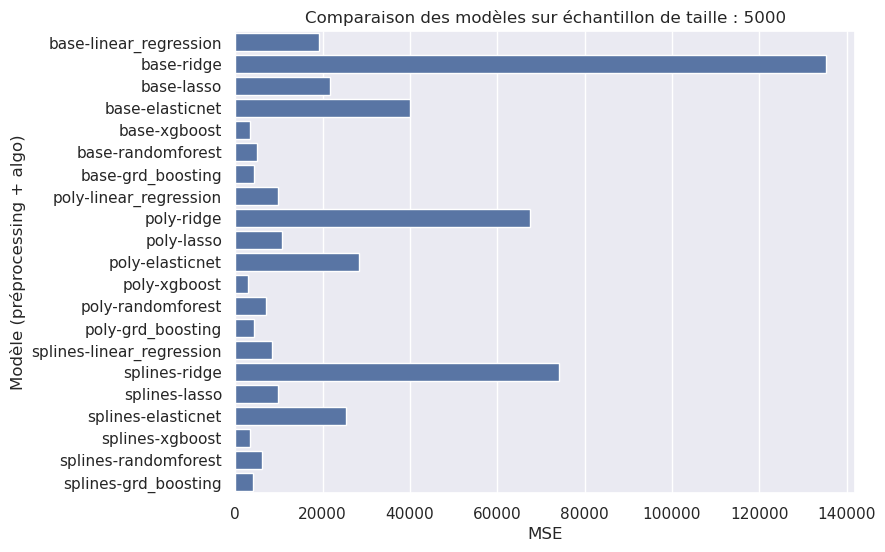

In [31]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=dict_results.values(), y=dict_results.keys())
ax.set_ylabel('Modèle (préprocessing + algo)')
ax.set_xlabel('MSE')
ax.set_title(f"Comparaison des modèles sur échantillon de taille : {sample_size}")
plt.show()

### Meilleur modèle sur la base de l'échantillon

In [33]:
best_model

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pitch_angle',
                                                   'Pitch_angle_std',
                                                   'Hub_temperature',
                                                   'Hub_temperature_std',
                                                   'Generator_converter_speed_std',
                                                   'Generator_speed_std',
                                                   'Generator_bearing_1_temperature',
                                                   'Generator_bearing_1_temperature_std',
                                                   'Generator_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=250, n_jobs=None,
                              num_parallel_tree=None, random_state=3, ...))])

### Scores finaux

Après entraînement sur le dataset d'entraînement complet et prévision sur jeu de test

In [32]:
print(f"MAE finale sur le dataset test après entraînement sur dataset train complet : {scores['mae']['test']:.2f}")
print(f"MSE finale sur le dataset test après entraînement sur dataset train complet : {scores['mse']['test']:.2f}")

MAE finale sur le dataset test après entraînement sur dataset train complet : 17.47
MSE finale sur le dataset test après entraînement sur dataset train complet : 1810.69


## Classification non supervisée

On cherche des groupes au sein des données car les individus étant nombreux il est crédible d'après les pots 2D que des groupes existent au sein du jeu d'entraînement

On prévoit une version centrée réduite du dataset pour les méthodes à base de distance (comme la distance euclidienne)

In [36]:
data_clustering = data_train.drop(columns=['Y'])
standard_scaler = StandardScaler()
data_clustering_sc = standard_scaler.fit_transform(data_clustering)

### KMEANS

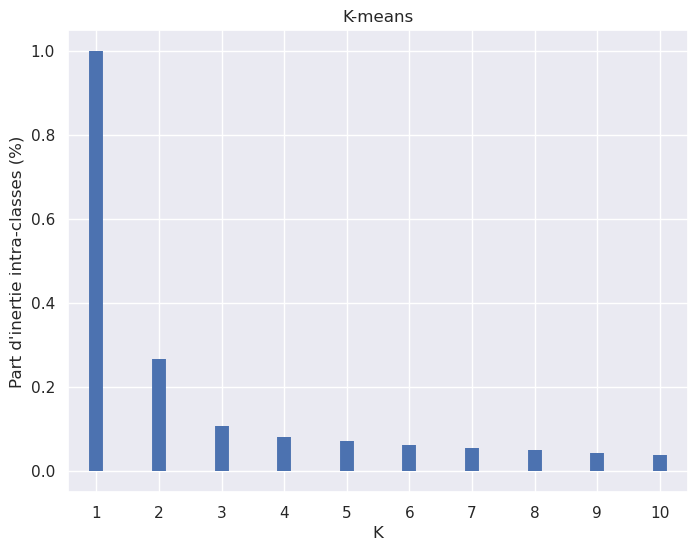

In [37]:
k_max = 10

inertie_intra = pd.DataFrame(columns=['k', 'inertie_intra'])

for k in range(1, k_max + 1):
    kmeans_model = KMeans(init='random', max_iter=100, n_clusters=k, n_init=5)
    kmeans_out = kmeans_model.fit(data_clustering)
    inertie_intra.loc[k - 1, 'k'] = k
    inertie_intra.loc[k - 1, 'inertie_intra'] = kmeans_out.inertia_ * 100

inertie_intra['part_inertie_intra'] = inertie_intra['inertie_intra'] / inertie_intra['inertie_intra'][0]

sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(inertie_intra['k'], 0, inertie_intra['part_inertie_intra'], linewidth=10)
ax.set_xticks(range(1, k_max+1))
ax.set_xlabel('K')
ax.set_ylabel("Part d'inertie intra-classes (%)")
plt.title('K-means')
plt.show()

On observe une rupture de pente via la méthode du coude autour de 3 groupes, on choisi donc ce nombre de groupes avec KMEANS

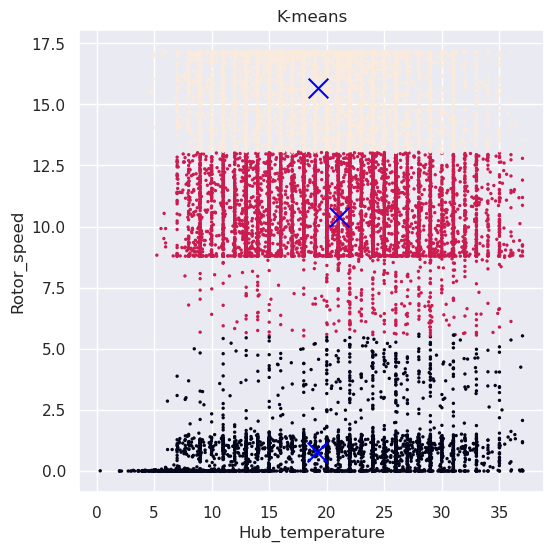

In [46]:
kmeans_final = KMeans(init='random', max_iter=300, n_clusters=3, n_init=50)
kmeans_out = kmeans_final.fit(data_clustering)

label_km = kmeans_out.labels_
centre = kmeans_out.cluster_centers_

# Une visualisation sur 2 variables des groupes et des centres pour imager la classification
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data=data_clustering, x='Hub_temperature', y='Rotor_speed', c=label_km, s=2)
plt.scatter(x=centre[:, data_clustering.columns.get_loc("Hub_temperature")], y=centre[:, data_clustering.columns.get_loc("Rotor_speed")], c='blue', s=200, marker="x")
ax.set_xlabel('Hub_temperature')
ax.set_ylabel('Rotor_speed')
plt.title('K-means')
plt.show()

Visualisation 2 à 2 pour tenter de comprendre les groupes (lourd)

In [54]:
# cols = data_clustering.columns
# for ni, i in enumerate(range(len(cols))):
#     for nj, j in enumerate(range(i + 1, len(cols))):
#         plt.figure(figsize=(6, 6))
#         plt.scatter(data_clustering[cols[i]], data_clustering[cols[j]], c=label)
#         plt.xlabel(cols[i])
#         plt.ylabel(cols[j])
#         plt.title(f'Scatter plot: {cols[i]} vs {cols[j]}')
#         plt.scatter(x=centre[:, ni], y=centre[:, nj], c=np.unique(label), s=200, marker="x")
#         plt.show()

### CAH

In [59]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

On choisi le linkage Ward pour ses groupes plus homogènes

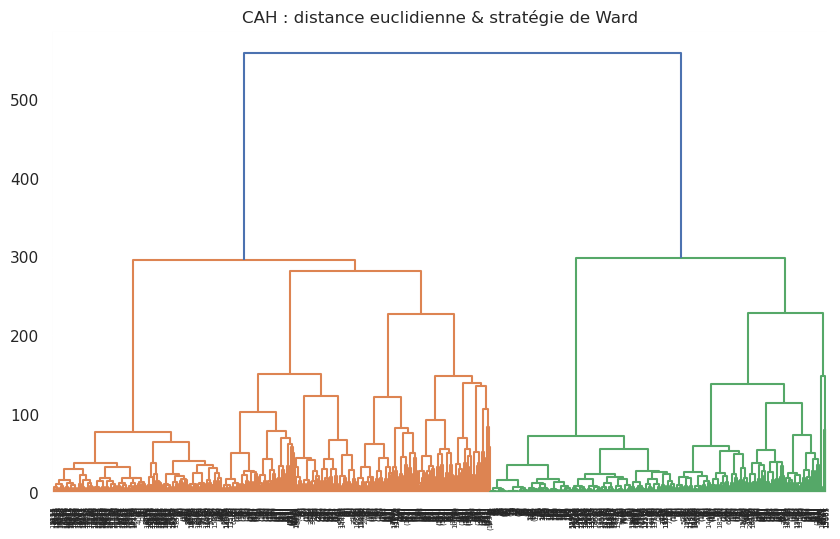

In [60]:
cah_model = AgglomerativeClustering(metric='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)
cah_out = cah_model.fit(data_clustering_sc)
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('CAH : distance euclidienne & stratégie de Ward')
plot_dendrogram(cah_out, truncate_mode='level', p=10)
plt.show()

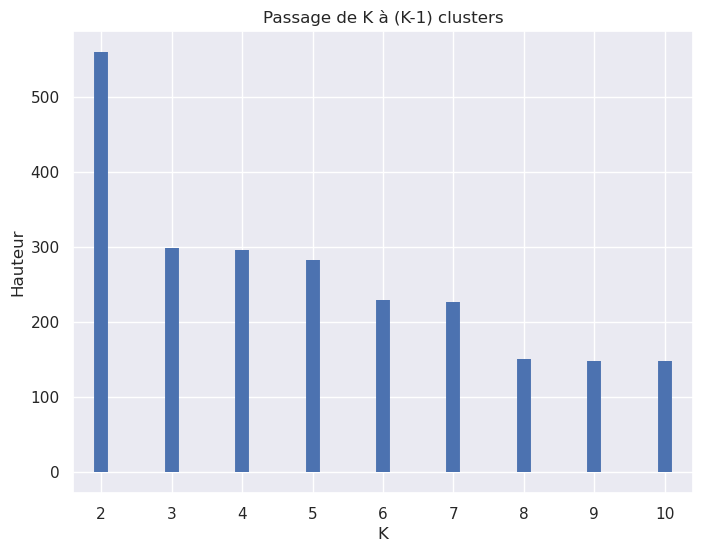

In [61]:
Max = 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.vlines(range(2, Max+1), 0, np.flip(np.sort(cah_out.distances_))[0:Max-1], linewidth=10)
ax.set_xticks(range(2, Max+1))
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

Stabilisation de la perte d'inertie à 3 groupes, on garde donc 3 groupes

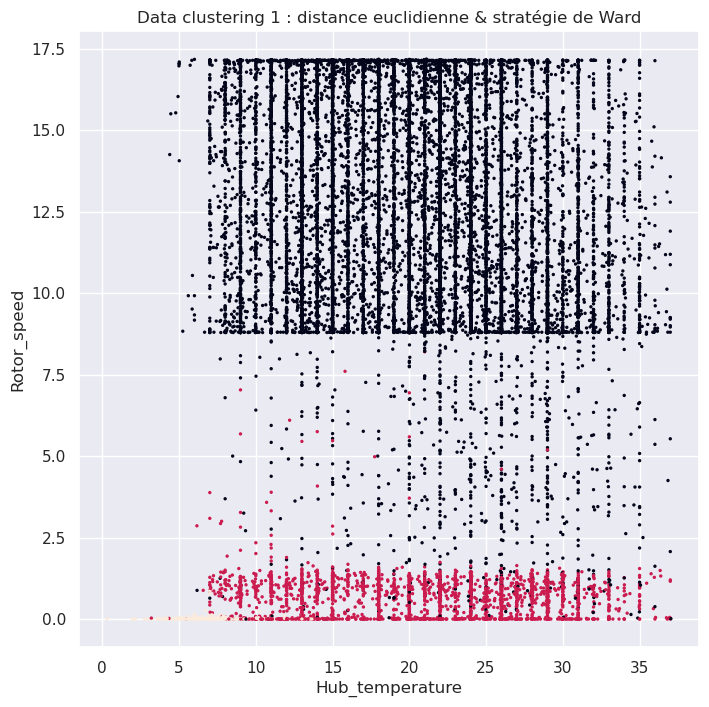

In [65]:
k = 3

cah_model = AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=k)
cah_out = cah_model.fit(data_clustering_sc)
label  = cah_out.fit_predict(data_clustering_sc)
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(data=data_clustering, x='Hub_temperature', y='Rotor_speed', c=label, s=2)
ax.set_xlabel('Hub_temperature')
ax.set_ylabel('Rotor_speed')
plt.title('Data clustering 1 : distance euclidienne & stratégie de Ward')
plt.show()

## Comparaison sur les groupes

Pour chaque groupe on refait une comparaison de modèle, on récupère le meilleur et on réalise une estimation.  

On prend ensuite le dataset test, on prédit la classe de chaque individu et on utilise le prédicteur de chaque groupe pour réaliser une prédiciton.  

Puis on calcule l'erreur finale

In [48]:
data_train_groupes = data_train.copy()
data_train_groupes['groupe'] = label_km
data_train_groupes.head(3)

,Pitch_angle,Pitch_angle_std,Hub_temperature,Hub_temperature_std,Generator_converter_speed,Generator_converter_speed_std,Generator_speed,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_std,...,Grid_frequency_std,Rotor_speed,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_std,Nacelle_angle_c,AbsWindSin,AbsWindCos,Y,groupe
0,92.410004,0.0,8.24,0.28,3.92,0.01,0.17,0.80,7.70,0.01,...,0.01,0.0,0.0,2.38,0.06,302.89999,-0.853187,0.521605,-2.727,0
1,92.410004,0.0,6.83,0.49,3.93,0.38,0.17,1.89,7.70,0.00,...,22.26,0.0,0.0,2.32,0.03,302.89999,-0.836286,0.548293,0.100,0
2,92.410004,0.0,2.00,0.00,4.26,0.02,0.00,0.05,-1.69,0.10,...,0.01,0.0,0.0,-2.10,0.07,301.81000,0.995193,0.097930,-4.993,0


In [52]:
start_time = time.time()

results_groupe = {} # Dictionnaire de résultats pour l'ensemble des groupes
y_pred_groupe = {} # Y prédit pour l'ensemble du jeu d'entrainement

array_groupe = data_train_groupes.groupe.unique()
array_groupe.sort()

for groupe in array_groupe: # Pour chaque groupe
    print(f"### Comparison for Group {groupe}")

    results_groupe[groupe] = {} # Résultats propres à l'éolienne

    data_groupe = data_train_groupes[data_train_groupes.groupe == groupe] # Données propres au groupe
    print(f"Shape of complete dataframe for group {groupe} = {data_groupe.shape}")

    X = data_groupe.drop(columns=['Y', 'groupe'])
    Y = data_groupe.Y

    # comparaison de modèles
    comparison = RegressionModelComparison(
        X,
        Y,
        scorings=metrics,
        test_size=test_size,
        seed=seed,
        mlflow=False
        )

    # Préparation des preprocesseurs
    comparison.preprocessing(
        numerical_features,
        other_features,
        nknots=4, # Nombre de knot des features splines
        poly_order=2, # Degré des polynomes des features polynomiales
        scaler='standard', # Scaler des features numériques
        verbose=False
        )

    # J'enlève la foret et le gradient boosting, trop longs mais l'idée est de tester plus d'algo et d'hyperparamètres
    df_results = comparison.run_comparison(
        preproc=['base', 'poly', 'splines'], # Préprocesseurs à tester (base, poly ou splines)
        model_param={
            'linear_regression': {},
            'ridge': {},
            'lasso': {},
            'elasticnet': {},
            'xgboost': {
                "regressor__n_estimators": [50, 100, 150, 200, 250],
                "regressor__learning_rate": [0.01, 0.05, 0.1]
                },
            # 'randomforest': {
            #     'regressor__n_estimators' : [100, 300], # Nombre d'arbres dans la forêt. defaut 100
            #     'regressor__max_depth' : [None, 20], # Profondeur maximale des arbres. Si None, les arbres sont développés jusqu'à ce que toutes les feuilles soient pures ou que chaque feuille contienne moins que min_samples_split échantillons
            #     'regressor__max_features': [3, X.shape[1] / 3] # Nombre maximum de caractéristiques considérées pour chaque split (division d'un nœud en deux sous-nœuds)
            #     },
            # 'grd_boosting': {
            #     'regressor__learning_rate' : [.01, 1],
            #     'regressor__max_depth' : [3, 7],
            #     'regressor__subsample' : [0.5, 1],
            #     'regressor__n_estimators' : [100, 300]
            #     }
            },
        nfolds=5,
        refit_metric='mse',
        verbose=False
        )
    
    # Selection du meilleur modèle selon la MSE sur le jeu de validation lors de la recherche sur grille
    best = df_results[df_results.mse_test == df_results.mse_test.min()]
    best_model = best.model.iloc[0]

    # Résultats intermédiaires
    results_groupe[groupe]['best_model'] = best_model # Extrait du meilleur modèle du groupe
    results_groupe[groupe]['best_params'] = best.params.iloc[0]

    scores = {}
    for metric in metrics: 
        scores[metric] = {}
        if metric == 'mae':
            scores[metric]['train'] = best.mae_train.values
            scores[metric]['valid'] = best.mae_test.values          
        elif metric == 'mse':
            scores[metric]['train'] = best.mse_train.values
            scores[metric]['valid'] = best.mse_test.values
    
    results_groupe[groupe]['metrics'] = scores

duration = time.time() - start_time
print(f"Total duration of computation = {duration / 60} minutes")

### Comparison for Group 0
Shape of complete dataframe for group 0 = (4278, 37)
##### Splitting Dataset with test_size = 0.1 and random_state = 3
###### Start comparison ######
Using preprocessor : base
Using regressor : linear_regression
Refit finalized using mse
Prevision score using ## mse ## on test set = 10.0753477122663
Prevision score using ## mae ## on test set = 2.1172278429965465
Using regressor : ridge
Refit finalized using mse
Prevision score using ## mse ## on test set = 7.802974179194511
Prevision score using ## mae ## on test set = 1.7963137917506407
Using regressor : lasso
Prevision score using ## mse ## on test set = 7.269747630928215
Prevision score using ## mae ## on test set = 1.732667444467791
Using regressor : elasticnet
Prevision score using ## mse ## on test set = 7.593309488061927
Prevision score using ## mae ## on test set = 1.7704993217922493
Using regressor : xgboost
Refit finalized using mse
Prevision score using ## mse ## on test set = 4.529598678509332
Pr

In [108]:
data_results = []
index_results = ['groupe', 'model', 'mse_train', 'mse_valid', 'mae_train', 'mae_valid', 'params']

for grpe in results_groupe.keys():
    data_results_grpe = [grpe]
    # best_model = str(type(results_groupe[grpe]['best_model'].named_steps['regressor'])).split('.')[-1]    
    best_model = results_groupe[grpe]['best_model']
    data_results_grpe.append(best_model)

    for metric in results_groupe[grpe]['metrics'].keys():
        for key, value in results_groupe[grpe]['metrics'][metric].items():
            data_results_grpe.append(value.iloc[0])

    data_results_grpe.append(results_groupe[grpe]['best_params'])

    data_results.append(data_results_grpe)

df_results_grpe = pd.DataFrame(data_results, columns=index_results)
df_results_grpe

,groupe,model,mse_train,mse_valid,mae_train,mae_valid,params
0,0,"(ColumnTransformer(transformers=[('num',\n ...",0.265742,4.398564,0.396090,1.083359,"{'regressor__learning_rate': 0.1, 'regressor__..."
1,1,"(ColumnTransformer(transformers=[('num',\n ...",8.203763,98.666739,1.968375,5.026099,"{'regressor__learning_rate': 0.1, 'regressor__..."
2,2,"(ColumnTransformer(transformers=[('num',\n ...",285.919932,3762.854411,11.301176,35.423376,"{'regressor__learning_rate': 0.1, 'regressor__..."


On obtient notre modèle champion pour chaque groupe

### Prévision sur jeu de test

In [75]:
data_test_groupes = data_test.copy()

Attribution de chaque individu test à un groupe

In [76]:
labels_test = kmeans_out.predict(data_test.drop(columns=['Y']))
data_test_groupes['groupe'] = labels_test
data_test_groupes.head(3)

,Pitch_angle,Pitch_angle_std,Hub_temperature,Hub_temperature_std,Generator_converter_speed,Generator_converter_speed_std,Generator_speed,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_std,...,Grid_frequency_std,Rotor_speed,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_std,Nacelle_angle_c,AbsWindSin,AbsWindCos,Y,groupe
0,-1.010000,0.0,20.969999,0.23,1423.75,63.220001,1424.6899,63.330002,40.160000,0.24,...,0.01,13.55,0.6,35.619999,0.02,241.44,-0.799789,-0.600281,385.199,2
1,89.980003,0.0,22.000000,0.00,2.98,0.010000,0.0000,0.000000,39.860001,0.09,...,0.01,0.00,0.0,30.590000,0.10,79.00,0.570714,0.821149,-4.454,0
2,91.949997,0.0,26.000000,0.00,2.85,0.010000,0.0000,0.000000,37.970001,0.11,...,0.01,0.00,0.0,27.959999,0.04,52.66,-0.814217,-0.580561,-2.001,0


Prédiction de la cible pour chaque individu via le prédicteur champion du groupe associé

In [109]:
y_pred = []
X_test_groupe = data_test_groupes.drop(columns=['Y'])
Y_test_groupe = data_test_groupes.loc[:, ['Y', 'groupe']]
for idr_, row in X_test_groupe.iterrows():
    X_row = pd.DataFrame(row).T.drop(columns=['groupe'])
    groupe = int(row.groupe)
    y_pred_row = df_results_grpe[df_results_grpe.groupe == groupe].model.iloc[0].predict(X_row) # On choisi le prédicteur associé au groupe identifié pour l'individu test
    y_pred.append(y_pred_row)

y_pred

[array([386.73944], dtype=float32),
 array([-2.1896346], dtype=float32),
 array([-2.277215], dtype=float32),
 array([397.7587], dtype=float32),
 array([89.18129], dtype=float32),
 array([1094.6583], dtype=float32),
 array([702.9556], dtype=float32),
 array([21.308073], dtype=float32),
 array([652.8062], dtype=float32),
 array([514.14374], dtype=float32),
 array([-3.8795743], dtype=float32),
 array([150.09915], dtype=float32),
 array([2125.4666], dtype=float32),
 array([120.56641], dtype=float32),
 array([-2.7823474], dtype=float32),
 array([947.5279], dtype=float32),
 array([774.5361], dtype=float32),
 array([-3.7780457], dtype=float32),
 array([-4.8640537], dtype=float32),
 array([2068.5315], dtype=float32),
 array([809.1747], dtype=float32),
 array([-4.729115], dtype=float32),
 array([567.35077], dtype=float32),
 array([82.19552], dtype=float32),
 array([40.908707], dtype=float32),
 array([520.5959], dtype=float32),
 array([-2.0008621], dtype=float32),
 array([64.63042], dtype=float3

### Scores finaux avec les groupes

In [110]:
mae_final = mean_absolute_error(y_true=data_test.Y, y_pred=y_pred)
mse_final = mean_squared_error(y_true=data_test.Y, y_pred=y_pred)

print(f"MAE finale sur l'ensemble du dataset : {mae_final:.2f}")
print(f"MSE finale sur l'ensemble du dataset : {mse_final:.2f}")

MAE finale sur l'ensemble du dataset : 17.79
MSE finale sur l'ensemble du dataset : 1974.10


# Conclusion

La démarche présentée ici se veut la plus proche possible de celle attendue. 
Des comparaisons supplémentaires seraient nécessaires ainsi qu'une évaluation de l'impact du point levier identifié.  
Le feature engineering mérite beaucoup plus de temps pour ajouter des effets non linéaires différents (log par exemple ou exp ou autre) sur certaines variables